In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df = df.drop(columns=['total_bedrooms', 'ocean_proximity', 'households'])
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value
20164,-119.28,34.45,36.0,2376.0,1505.0,2.4595,197600.0
14761,-117.06,32.55,5.0,3223.0,3284.0,1.4384,108800.0
10391,-117.65,33.58,2.0,2411.0,703.0,7.8061,331400.0
8646,-118.40,33.87,45.0,2093.0,842.0,6.3231,500001.0
16692,-120.61,35.12,12.0,3430.0,1840.0,2.9821,162000.0


In [4]:
df.shape

(20640, 7)

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
X = df.iloc[:,:6]
y = df.iloc[:,-1]

In [7]:
X

,longitude,latitude,housing_median_age,total_rooms,population,median_income
0,-122.23,37.88,41.0,880.0,322.0,8.3252
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014
2,-122.24,37.85,52.0,1467.0,496.0,7.2574
3,-122.25,37.85,52.0,1274.0,558.0,5.6431
4,-122.25,37.85,52.0,1627.0,565.0,3.8462
...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603
20636,-121.21,39.49,18.0,697.0,356.0,2.5568
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 11)

In [10]:
X_train.shape

(16512, 6)

In [11]:
X_test.shape

(4128, 6)

In [12]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

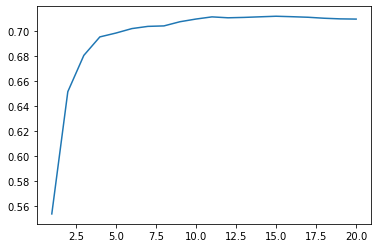

In [15]:
# Finding optimal value of k

accuracy = []

for i in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = r2_score(y_test, y_pred)
    accuracy.append(acc)
    
plt.plot(range(1,21), accuracy)

In [16]:
knn = KNeighborsRegressor(n_neighbors= 11)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.7110777906608565